# Avacado Project

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
data = pd.read_csv('D:\DATA SC_Practice Project\\eva\\Avocado.csv')
print("Total Number of samples: %d" % len(data))
data.head(5)

Total Number of samples: 18249


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Here we can see that only year has integer value.And 3 object value.

In [4]:
data.shape

(18249, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Here I have found Column Unnamed,we can remove this .

In [6]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [7]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
#Now lets see the description of the data
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


The total number of rows of data are same for all features.

Our dataset has 10 features with float64 datatype and 3 features with object datatype.

The values of standard deviation for 'Total Volume','Total Bags','Small Bags','XLarge Bags' features is greater than 3, which means the data in these feature columns is spread away from the mean.

# EDA

Observation: There is so many null values in the columns,we have to fill that values.

In [10]:
# Checking missing values
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no missing values

<AxesSubplot:>

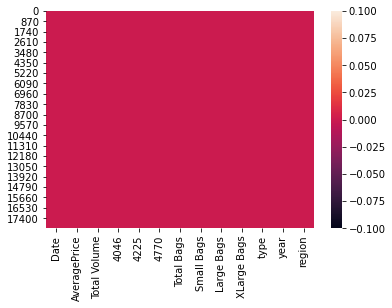

In [11]:
sns.heatmap(data.isnull())

We can see both the type conventional and organic equally distributed.

<AxesSubplot:xlabel='year', ylabel='count'>

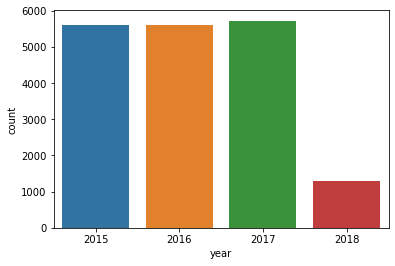

In [12]:
sns.countplot(x='year',data=data)

In the year of 2018 Acocado has very low value.

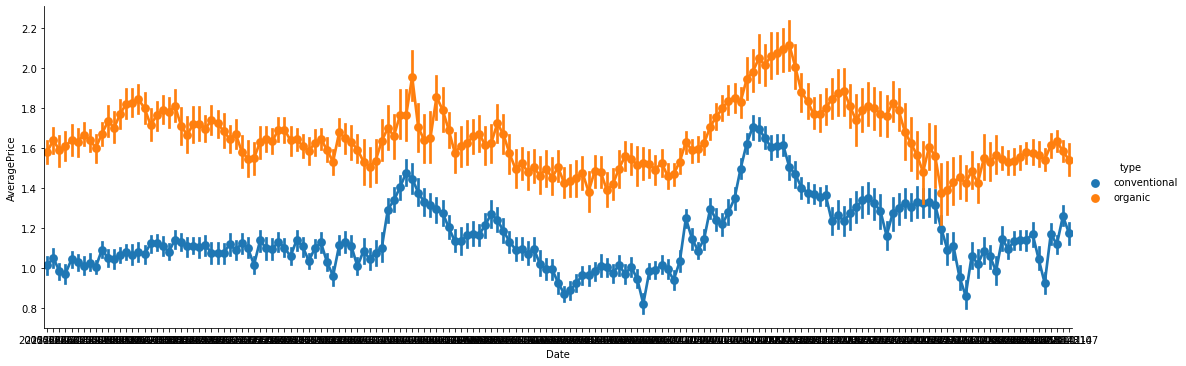

In [13]:
ax=sns.factorplot(x='Date', y='AveragePrice', data=data, hue='type',aspect=3)

From above observation we can see, How the average price changing over time

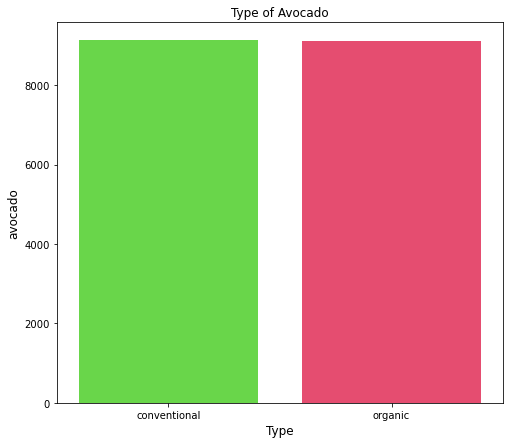

In [14]:

# Let's visualize the count of conventional using seaborn
avocado_type=data['type'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(avocado_type.index, avocado_type.values, alpha=0.8, palette="prism")
plt.ylabel('avocado', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.title('Type of Avocado')
plt.show()

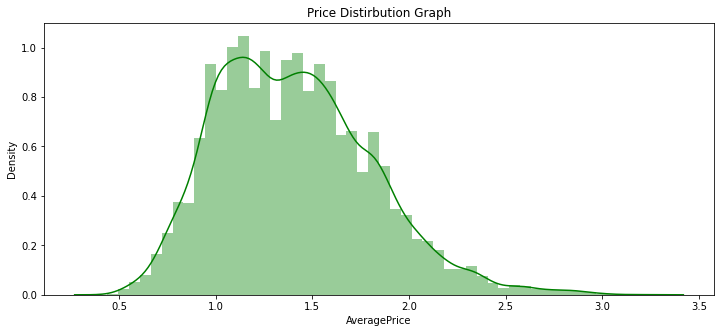

In [15]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(data["AveragePrice"], color = 'green')

In [16]:
data['region'].value_counts()

Columbus               338
HartfordSpringfield    338
LasVegas               338
RichmondNorfolk        338
Boise                  338
Boston                 338
Philadelphia           338
Southeast              338
StLouis                338
NewOrleansMobile       338
HarrisburgScranton     338
DallasFtWorth          338
RaleighGreensboro      338
Northeast              338
NewYork                338
Detroit                338
GreatLakes             338
Midsouth               338
Indianapolis           338
Seattle                338
Charlotte              338
Syracuse               338
SanFrancisco           338
MiamiFtLauderdale      338
Denver                 338
Houston                338
Chicago                338
TotalUS                338
Spokane                338
Atlanta                338
CincinnatiDayton       338
Plains                 338
Nashville              338
BaltimoreWashington    338
GrandRapids            338
Albany                 338
SouthCentral           338
S

<AxesSubplot:>

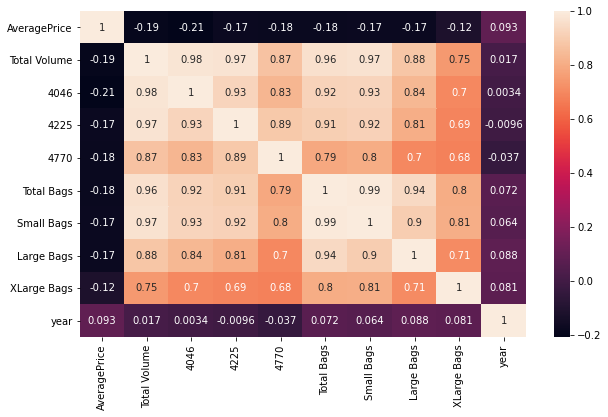

In [17]:
# Correlation Matrix
dfcor=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,annot=True)

Now we will check the outliers

AveragePrice       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Total Volume    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
4046             AxesSubplot(0.44569,0.536818;0.133621x0.343182)
4225            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
4770            AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.133621x0.343182)
Small Bags         AxesSubplot(0.285345,0.125;0.133621x0.343182)
Large Bags          AxesSubplot(0.44569,0.125;0.133621x0.343182)
XLarge Bags        AxesSubplot(0.606034,0.125;0.133621x0.343182)
year               AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

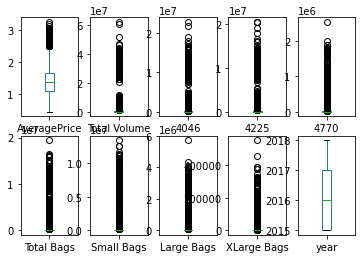

In [18]:
# checking outliers
data.plot.box(subplots=True,layout=(2,5))

There is out outliers in so many columns,we have to remove it.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['region'] = le.fit_transform(data['region'])
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0


# Model Building

In [20]:
# Import libraries fore Classification & Regression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [21]:
#Creating a new dataframe
avocado_new=data[["AveragePrice","Total Volume","region","type","Total Bags","year"]]

#feature columns
X=data[["AveragePrice","Total Volume","region","Total Bags","year"]]

#predictor variable
y=data.type

#create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 5)
Y Train Shape  (14599,)
X Test Shape  (3650, 5)
Y Test Shape  (3650,)


In [22]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test) 

#Accuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for Logistic Regression test data is: 0.9084931506849315


In [23]:
#Confusion matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1586                     262
Conventional                 72                    1730


In [24]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(logreg, X,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.92657534 0.89589041 0.90465753 0.8909589  0.89421759]
Mean: 0.9024599571284307
Std: 0.012882164917437792


Random forest classfier

In [25]:
model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [26]:
#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using Random Forest : 0.9961643835616438


In [27]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                    1840                       8
Conventional                  6                    1796


In [28]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(model, X,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.97808219 0.97260274 0.99068493 0.96821918 0.98081666]
Mean: 0.9780811406390193
Std: 0.007663025577926389


Decision Tree classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state = 0)

dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [31]:
#Accuracy score
print('Accuracy score for test data using Decision Tree :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using Decision Tree : 0.9917808219178083


In [32]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Decision Tree model")
print(confusion_matrix)

Confusion matrix for Decision Tree model
              Predicted organic  Predicted Conventional
organic                    1834                      14
Conventional                 16                    1786


In [33]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(dtc, X,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.9860274  0.96849315 0.97315068 0.96493151 0.9591669 ]
Mean: 0.9703539269531529
Std: 0.009071872329264347


 Support vector machine model

In [34]:
from sklearn.svm import SVC
svc=SVC(random_state = 0)

svc.fit(X_train, y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [35]:
#Accuracy score
print('Accuracy score for test data using Support Vector :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using Support Vector : 0.9038356164383562


In [36]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Support Vector model")
print(confusion_matrix)

Confusion matrix for Support Vector model
              Predicted organic  Predicted Conventional
organic                    1598                     250
Conventional                101                    1701


In [37]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(svc, X,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.89835616 0.88191781 0.92328767 0.87972603 0.88407783]
Mean: 0.8934731001550433
Std: 0.01626979321215723


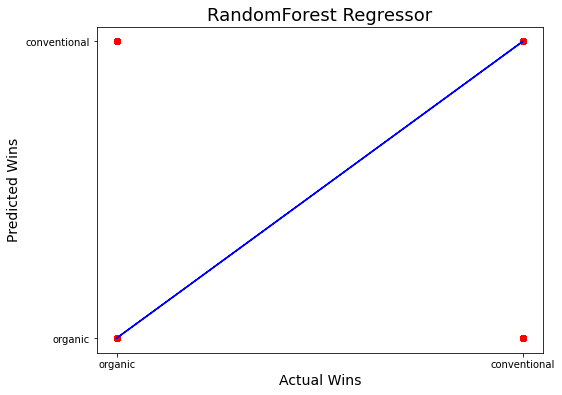

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('RandomForest Regressor',fontsize=18)
plt.show()

In [38]:
#Saving the model to the local file system:
import pickle

In [39]:
filename='Avocado.pickle'
pickle.dump(model,open(filename,'wb'))